# Project 1: Sentiment Analysis on Movie Reviews

This project is an individual project. In this project, you are expected to solve the classification problem on movie reviews. Movie reviews have two different sentiments (positive or negative), please train machine learning or deep learning models to classify movie reviews into correct categories (1 for positive 1 and 0 for negative).

**NOTE:**
* Please solve the problems in this notebook using the dataset `IBDM Dataset.csv`.
* Important Dates: 
    * Project Start: Feb 19, Monday
    * Project Due: March 7, Thursday midnight
* Submission should include a pdf report (at least 4 pages) and code.
* There are always last minute issues submitting the project. DO NOT WAIT UNTIL THE LAST MINUTE!

**HINT:**
* Here are some related tutorials that would be helpful:
    * https://www.kaggle.com/competitions/sentiment-analysis-on-movie-reviews/code
    * https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html 



# Data Exploration: Exploring the Dataset

To explore the data before preprocessing, we will go through the following exploration steps:

1. Load the data to a pandas df
2. Understand the structure, using mehods like info(), describe(), etc.
3. Check for missing values
4. Check the balance of the classes
5. Visualize the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None

Description:
                                                    review sentiment
count                                               50000     50000
unique                                              49582         2
top     Loved today's show!!! It was a variety and not...  positive
freq                                                    5     25000

First 5 rows:
                                               review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  

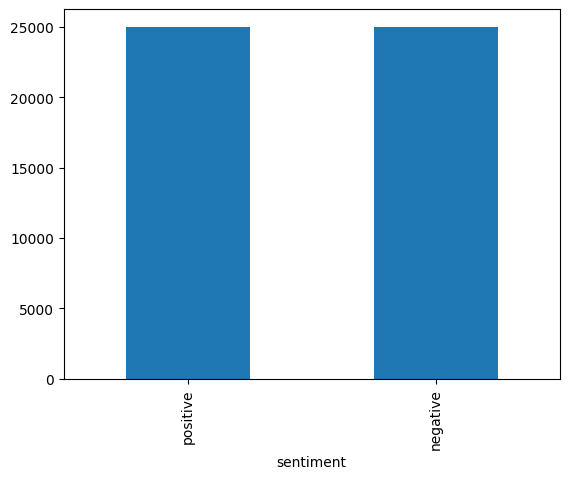

In [113]:
import pandas as pd 
import matplotlib.pyplot as plt 

# Load the data
df = pd.read_csv('IMDB Dataset.csv')

# Understand the structure of the data
print(df.info())
print('\nDescription:\n', df.describe())
print('\nFirst 5 rows:\n', df.head())

# Check for missing values
print('\nMissing Values:\n', df.isnull().sum())

# Check the balance of the data
print('\nSentiment Value Counts:\n', df['sentiment'].value_counts())

# Visualize the data
df['sentiment'].value_counts().plot(kind='bar')
plt.show()

From the above analysis, there are a few key takeaways:

1. Size: Dataset contains 50,000 entries, each with a review an a sentiment
2. No missing values: Both columns contain equal number of values -- so no need to handle any missing entries
3. Unique reviews: There are 49,582 unique reviews, meaning some of the reviews are duplicates but most are unique
4. Balance: The dataset is perfectly balanced, with 25,000 positive and 25,000 negative reviews

In summary, the dataset seems to be clean and well balanced. Next, we will move onto preprocessing the text data for model training.

# Data Preproccessing

Here are some common preproccessing steps, feel free to add more preproccessing steps if needed: 
1. check missing values. 
2. remove noise and special characters, such as "\[[^]]*\]", etc.
3. transform all words to lower case, 
4. word tokenization  
5. stop words removing and stemming,
6. divide the dataset into train set (75%) and test set (25%) with random sampling

 ......

**Hint:**
* You may need TfidVectorizer class to convert a collection of raw documents to a matrix of TF-IDF features: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html, 
* You are also welcome to use the Python Natural Language Processing Toolkit (www.nltk.org).
 


In [61]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from bs4 import BeautifulSoup
import re

# Download stopwords
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

After importing the necessary modules, we will now begin preprocessing our data for feature extraction. For stemming, we will use PorterStemmer from the NLTK package.

In [114]:
stop_words = set(stopwords.words('english'))

# Initialize stemmer
stemmer = PorterStemmer()

# Function to preprocess text
def preprocess_text(text):
    # Remove HTML tags
    text = BeautifulSoup(text, "html.parser").get_text()
    # Removing noise and special chars
    text = re.sub("\[[^]]*\]", "", text)
    # Lowercasing
    text = text.lower()
    # Tokenization
    text = word_tokenize(text)
    # Stemming/stop word removal
    text = [stemmer.stem(word) for word in text if word not in stop_words]

    return ' '.join(text)

# Apply the function to the review column of our df
df['review'] = df['review'].apply(preprocess_text)
df

C:\Users\owenc\AppData\Local\Temp\ipykernel_22292\2316146534.py:9: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()


,review,sentiment
0,one review mention watch 1 oz episod 'll hook ...,positive
1,wonder littl product . film techniqu unassumin...,positive
2,thought wonder way spend time hot summer weeke...,positive
3,basic 's famili littl boy ( jake ) think 's zo...,negative
4,petter mattei 's `` love time money '' visual ...,positive
...,...,...
49995,thought movi right good job . n't creativ orig...,positive
49996,"bad plot , bad dialogu , bad act , idiot direc...",negative
49997,"cathol taught parochi elementari school nun , ...",negative
49998,'m go disagre previou comment side maltin one ...,negative


Observing the above output to ensure proper preprocessing:
- all text is lowercased
- no apparent html tags, special characters
- text appears to be stemmed

From here, we will use TfidVectorizer to fit and transform the preprocessed reviews. This converts the text data into a matrix of TF-IDF features. This matrix reflects the importance of a specific word is to a document in a collection or corpus (search).

Fitting the vectorizer on our review column means it is learning the vocabulary of the dataset. It is then transformed into a numerical vector which reflects the importance of a word in a particular document.

The importance of using vectorization is that it converts text data, which is unstructured, into a structured form that can be used as input to a machine learning model. Machine learning algorithms work with numerical data, and vectorization methods convert text into numerical data while preserving the semantic relationship between words.

After vectorization, the data is split into training and test sets.

In [115]:
# Initialize TfidfVectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the vectorizer
X = vectorizer.fit_transform(df['review'])

# Map the sentiment to 1 and 0 and set our target variable
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})
y = df['sentiment']

# Split the data. 75% for training and 25% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("Train set size: ", X_train.shape[0])
print("Test set size: ", X_test.shape[0])

Train set size:  37500
Test set size:  12500


**Rationale behind preprocessing steps:**

    preprocess_text() function:

We define a seperate preprocess_text() function which handles all of our text preprocessing steps. Some of these steps could have been passed as parameters when initializing our TfidfVectorizer -- however by defining a seperate funciton, we maintain more control over the process. For example, the vectorizer has built in options for lowercasing, tokenization, and some others, but it does not have the same stemming capabilities. Thus, we elect to handle all of our preprocessing steps in one function, including using PorterStemmer.


    TfidfVectorizer() Initialization and Default Parameters:

While TfidfVectorizer() has many built in init parameters, I've elected to use the default parameters for the following reason: Fine tuning would likely involve using grid search or cross validation to give us our optimal parameters. However, this is a computationally intensive process and would require seperate analysis for each of our ML models. For our sake, the default parameters will likely not harm our model performance enough to justify computing optimal parameters for each specific model. 

Now that we have our training and test sets, we can move on to model training.


# Data Modelling

* Please use the following models to classify the data:
    * Logistic Regression
    * LinearSVC
    * KNeighborsClassifier
    * Fully-connected layers, please try different number of hidden layers, different values of "hidden_layer_sizes" and "activation".
    * CNN (please use different number of convolutional layers combined with different number of fully-connected layers, and compare the results).


### Logistic Regression

In [124]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Initialize the mode
lr_model = LogisticRegression(random_state=42)

# Fit the model
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr_model.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      6157
           1       0.88      0.90      0.89      6343

    accuracy                           0.89     12500
   macro avg       0.89      0.89      0.89     12500
weighted avg       0.89      0.89      0.89     12500



### LinearSVC 

In [120]:
from sklearn.svm import LinearSVC

# Initialize the model
svc_model = LinearSVC(random_state=42)

# Fit the model
svc_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svc_model.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

c:\Users\owenc\anaconda3\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.89      0.88      0.89      6157
           1       0.89      0.90      0.89      6343

    accuracy                           0.89     12500
   macro avg       0.89      0.89      0.89     12500
weighted avg       0.89      0.89      0.89     12500



### KNeighbors Classifer

In [93]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the model using 5 nearest neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)

# Fit the model
knn_model.fit(X_train, y_train)

# Make predictions on test set
y_pred = knn_model.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

c:\Users\owenc\anaconda3\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\owenc\anaconda3\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


              precision    recall  f1-score   support

           0       0.82      0.72      0.77      6157
           1       0.76      0.85      0.80      6343

    accuracy                           0.78     12500
   macro avg       0.79      0.78      0.78     12500
weighted avg       0.79      0.78      0.78     12500



In [94]:
# Initialize the model using 10 nearest neighbors
knn_model = KNeighborsClassifier(n_neighbors=10)

# Fit the model
knn_model.fit(X_train, y_train)

# Make predictions on test set
y_pred = knn_model.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.77      0.79      6157
           1       0.79      0.81      0.80      6343

    accuracy                           0.79     12500
   macro avg       0.79      0.79      0.79     12500
weighted avg       0.79      0.79      0.79     12500



### Fully-Connected Layers

To test out different initialization parameters, we will first use grid search to find the optimal parameters for our model.

Grid search is a hyperparameter tuning technique to find the optimal parameters for a model. It involves defining a grid of hyperparameters and training a model on every combination of these hyperparameters. Each model is then evaluated on a validation set using cross validation. 

Grid search can be computationally intensive, so for our case we will first define our grid to be 

        {'hidden_layer_sizes': [(100,), (100, 50), (100, 50, 25)], 'activation': ['relu', 'tanh']}


Giving us 3 * 2 = 6 combinations of our parameters. We would be able to test more parameters if we had access to greater computing power.

Depending on how this performs, we may come back and test new parameters.

In [5]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

# Define our parameter grid
mlp_param_grid = {
    'hidden_layer_sizes': [(100,), (100,50), (100,50,25)],
    'activation': ['relu', 'tanh']
}

# Initialize grid search
mlp_grid_search = GridSearchCV(MLPClassifier(random_state=42), mlp_param_grid, cv=3, n_jobs=-1)

# Perform grid search
mlp_grid_search.fit(X_train, y_train)

NameError: name 'grid_search' is not defined

*Note:* Ignore error, small typo when printing results

In [6]:
# Print best params and best score
print(mlp_grid_search.best_params_)
print(mlp_grid_search.best_score_)

{'activation': 'relu', 'hidden_layer_sizes': (100, 50)}
0.8732266666666666


In [126]:
mlp_model = mlp_grid_search.best_estimator_

# Make predictions on test set
y_pred = mlp_model.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87      6157
           1       0.87      0.88      0.88      6343

    accuracy                           0.87     12500
   macro avg       0.87      0.87      0.87     12500
weighted avg       0.87      0.87      0.87     12500



### CNN

To implement CNN, we'll use numpy, TensorFlow and Keras to test the model with different combinations of convolutional and fully connected layers.

This will require some further data preprocessing steps to prepare it for a CNN model. Previously, we converted the raw text data to a matrix of TF-IDF features. This is suitable for the other models we trained, but will not work for CNN. The previous models treated each document as a "bag of words", but CNN considers sequence of the words as well.

To preprocess our data, we will take the following steps:

1. Tokenization: We will first tokenize our words and convert to numerical format. The parameter 'num_words' is set to 5000, meaning we are only concerned with the 5000 most frequent words in our document.
2. Padding: After tokenization, each review will be converted to a sequence of integers. Neural networks require that each input is the same length, so we will ensure that each of our reviews are of the same length.
3. Labels to Array: We will lastly convert our 'sentiment' labels to a numpy array since this is the required format for CNN.

In [49]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Initialize tokenizer with 5000 word vocab size
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df['review'])

# Convert text to sequences
sequences = tokenizer.texts_to_sequences(df['review'])

# Pad sequences such that they all have the same length

# max_length = max([len(sequence) for sequence in sequences])
# **Adjust padding sequences as needed**
X = pad_sequences(sequences, maxlen=500)

# Convert sentiments to numpy array
y = df['sentiment'].values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Now our data is ready to train a CNN for text classification. We want to test different combinations of convolutional and fully connected layers. To do so, we will define a function which takes number of layers as input and returns a compiled CNN model. This will allow us to test differnt combinations efficiently.

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Flatten

def create_cnn_model(num_conv_layers, num_dense_layers, vocab_size=5000, embedding_dim=50, max_length=100):
    # Initialize the mode
    model = Sequential()
    # Add embedding layer
    model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))

    # Add convolutional layers using 128 filters of size 5 and relu activation
    # This is a common starting point and may be fine tuned later
    for _ in range(num_conv_layers):
        model.add(Conv1D(128, 5, activation='relu'))

    # Add global max pooling layer
    model.add(GlobalMaxPooling1D())

    # Add dense layers with 10 units and relu activation
    for _ in range(num_dense_layers):
        model.add(Dense(10, activation='relu'))

    # Add output layer with 1 unit and sigmoid activation, so that output is between 0 and 1
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model using adam optimizer and binary crossentropy loss
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model


In [44]:
max_length = max([len(sequence) for sequence in sequences])

cnn_model = create_cnn_model(2, 2, max_length=500)

# Fit the model
cnn_model.fit(X_train, y_train, epochs=8, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = cnn_model.evaluate(X_test, y_test)

print(f'CNN Model Accuracy: {accuracy*100:.2f}%')


Epoch 1/8
1172/1172 [==============================] - 82s 69ms/step - loss: 0.4217 - accuracy: 0.7831 - val_loss: 0.3083 - val_accuracy: 0.8665
Epoch 2/8
1172/1172 [==============================] - 87s 74ms/step - loss: 0.2521 - accuracy: 0.8983 - val_loss: 0.2807 - val_accuracy: 0.8828
Epoch 3/8
1172/1172 [==============================] - 87s 74ms/step - loss: 0.1749 - accuracy: 0.9352 - val_loss: 0.2952 - val_accuracy: 0.8832
Epoch 4/8
1172/1172 [==============================] - 88s 75ms/step - loss: 0.1100 - accuracy: 0.9625 - val_loss: 0.3547 - val_accuracy: 0.8772
Epoch 5/8
1172/1172 [==============================] - 93s 80ms/step - loss: 0.0668 - accuracy: 0.9789 - val_loss: 0.4452 - val_accuracy: 0.8698
Epoch 6/8
1172/1172 [==============================] - 91s 78ms/step - loss: 0.0476 - accuracy: 0.9842 - val_loss: 0.4821 - val_accuracy: 0.8740
Epoch 7/8
1172/1172 [==============================] - 94s 80ms/step - loss: 0.0316 - accuracy: 0.9905 - val_loss: 0.6409 - val_ac

Initial Model Tuning:

Before testing different combinations of convolutional and full connected layers, we experiment with the max length parameter. This determines how long our sequences will be. For example, setting max_lenth at 100 will only take the first 100 words of a review, whereas setting max_length to the max length of any sequence in 'sequences' will include every word from every review. These were the results:

Results for max length = 100 Sequences, 10 epochs:
CNN Model Accuracy: 85.34%

Results for max length = 200, 10 epochs:
CNN Model Accuracy: 87.23%

Results for max length = 500, 8 epochs:
CNN Model Accuracy: 87.09%

Results for max length = 1128 (max length of sequence), 5 epochs:
CNN Model Accuracy: 87.34%

So, by increasing our max length, we aren't necessarily improving the accuracy. Using 200 words gives the model enough information about the review to evaluate its sentiment while saving computational cost.

To test different numbers of layers, we'll use 200 sequences and 500 sequences. We will also introduce early stopping criteria such that a model will stop training if it does not show improvement for 2 consecutive epochs. This will save some computational cost. We'll use combinations of 1-3 convoluational/dense layers to train the models.


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping criteria
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)

In [48]:
# Testing with 200 max length
for num_conv_layers in range(1, 4):
    for num_dense_layers in range(1, 4):
        model = create_cnn_model(num_conv_layers, num_dense_layers, max_length=200)
        model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), callbacks=[early_stop])
        loss, accuracy = model.evaluate(X_test, y_test)
        print(f'CNN Model with {num_conv_layers} conv layers and {num_dense_layers} dense layers Accuracy: {accuracy*100:.2f}%')

Epoch 1/10
1172/1172 [==============================] - 19s 15ms/step - loss: 0.3728 - accuracy: 0.8289 - val_loss: 0.2841 - val_accuracy: 0.8818
Epoch 2/10
1172/1172 [==============================] - 17s 14ms/step - loss: 0.2167 - accuracy: 0.9154 - val_loss: 0.2784 - val_accuracy: 0.8863
Epoch 3/10
1172/1172 [==============================] - 17s 15ms/step - loss: 0.1283 - accuracy: 0.9547 - val_loss: 0.3013 - val_accuracy: 0.8860
Epoch 4/10
1172/1172 [==============================] - 17s 15ms/step - loss: 0.0535 - accuracy: 0.9853 - val_loss: 0.3757 - val_accuracy: 0.8813
Epoch 5/10
1172/1172 [==============================] - 17s 15ms/step - loss: 0.0175 - accuracy: 0.9970 - val_loss: 0.4483 - val_accuracy: 0.8832
Epoch 6/10
1172/1172 [==============================] - 17s 15ms/step - loss: 0.0065 - accuracy: 0.9992 - val_loss: 0.5193 - val_accuracy: 0.8822
Epoch 7/10
1172/1172 [==============================] - 17s 15ms/step - loss: 0.0054 - accuracy: 0.9986 - val_loss: 0.6095 -

Best Performance:

CNN Model with 1 conv layers and 1 dense layers

Accuracy: 87.98%

In [54]:
# Testing with 500 max length 
for num_conv_layers in range(1, 4):
    for num_dense_layers in range(1, 4):
        model = create_cnn_model(num_conv_layers, num_dense_layers, max_length=500)
        model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), callbacks=[early_stop])
        loss, accuracy = model.evaluate(X_test, y_test)
        print(f'CNN Model with {num_conv_layers} conv layers and {num_dense_layers} dense layers Accuracy: {accuracy*100:.2f}%')

Epoch 1/10
1172/1172 [==============================] - 39s 33ms/step - loss: 0.3661 - accuracy: 0.8344 - val_loss: 0.2731 - val_accuracy: 0.8860
Epoch 2/10
1172/1172 [==============================] - 41s 35ms/step - loss: 0.2103 - accuracy: 0.9176 - val_loss: 0.2651 - val_accuracy: 0.8925
Epoch 3/10
1172/1172 [==============================] - 42s 36ms/step - loss: 0.1143 - accuracy: 0.9609 - val_loss: 0.3068 - val_accuracy: 0.8868
Epoch 4/10
1172/1172 [==============================] - 43s 36ms/step - loss: 0.0425 - accuracy: 0.9899 - val_loss: 0.3799 - val_accuracy: 0.8851
Epoch 4: early stopping
391/391 [==============================] - 6s 16ms/step - loss: 0.3799 - accuracy: 0.8851
CNN Model with 1 conv layers and 1 dense layers Accuracy: 88.51%
Epoch 1/10
1172/1172 [==============================] - 47s 37ms/step - loss: 0.3691 - accuracy: 0.8290 - val_loss: 0.2885 - val_accuracy: 0.8766
Epoch 2/10
1172/1172 [==============================] - 44s 38ms/step - loss: 0.2044 - accu

Best performance:

CNN Model with 1 conv layers and 1 dense layers 

Accuracy: 88.51%

# Results: summarize and visualize the results discovered from the analysis

Please use figures or tables to present the results.


## Model Performance

In [110]:
data = {
    'Model': ['Logistic Regression', 'Linear SVC', 'KNN (5)', 'KNN (10)', 'MLP (100, 50)', 'CNN (200, 1, 1)', 'CNN (500, 1, 1)'],
    'Test Accuracy': [0.89, 0.89, 0.78, 0.79, 0.87, 0.88, 0.885]
}

df = pd.DataFrame(data)

# Sort the df by test accuracy
df = df.sort_values(by='Test Accuracy', ascending=False)

df

,Model,Test Accuracy
0,Logistic Regression,0.890
1,Linear SVC,0.890
6,"CNN (500, 1, 1)",0.885
5,"CNN (200, 1, 1)",0.880
4,"MLP (100, 50)",0.870
3,KNN (10),0.790
2,KNN (5),0.780


## Visualization

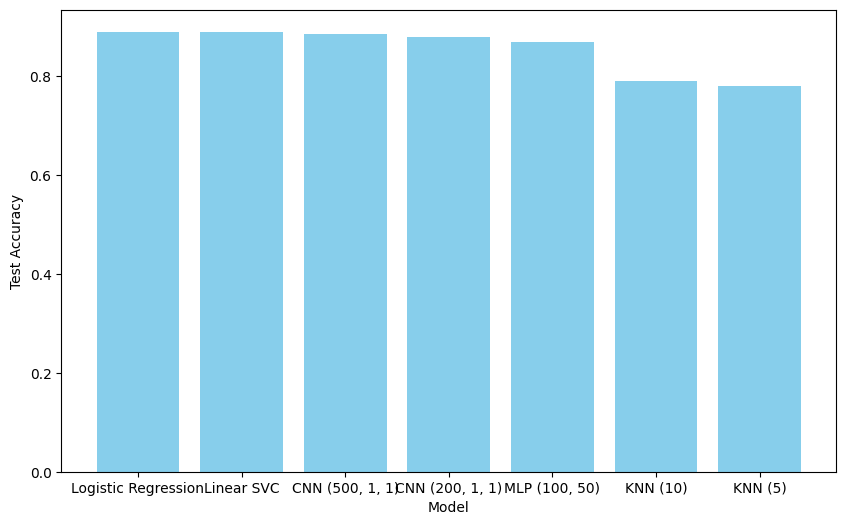

In [111]:
import matplotlib.pyplot as plt

# Creating bar plot to visualize test accuracy
plt.figure(figsize=(10,6))
plt.bar(df['Model'], df['Test Accuracy'], color='skyblue')

plt.xlabel('Model')
plt.ylabel('Test Accuracy')

plt.show()

By analyzing the model accuracy df and bar plot, we can rank the models in descending order by:

1. Log Regresstion
2. Linear SVC
3. CNN (500,1,1)
4. CNN (200,1,1)
5. MLP (100,50)
6. KNN (10)
7. KNN (5)

The top 5 models all perform relatively well, then a dropoff showing the KNN models performing worst.

## User Testing

Finally, to show the functionality of the program, a user is able to input a custom review to check the accuracy of the models. The input will be preprocessed and each model will predict the sentiment of the inputted review. 

We will not include the CNN model since it requires different processing than the other models. Furthermore, the optimal CNN model was not explicitally defined

In [144]:
review = input("Enter a review. Type 'q' to exit: ")

while review != 'q':
    print(f'Review: {review}')

    # Preprocess the review
    review = preprocess_text(review)

    # Convert the review into Tfidf form
    review = vectorizer.transform([review])

    # Make predictions for each model
    lr_pred = lr_model.predict(review)
    svc_pred = svc_model.predict(review)
    knn_pred = knn_model.predict(review)
    mlp_pred = mlp_model.predict(review)

    # Print the predictions
    print(f'Logistic Regression Prediction: {lr_pred}')
    print(f'Linear SVC Prediction: {svc_pred}')
    print(f'KNN Prediction: {knn_pred}')
    print(f'MLP Prediction: {mlp_pred}')
    print('---------------------------------')

    review = input("Enter a review. Type 'q' to exit: ")


Review: This was a great movie.
Logistic Regression Prediction: [1]
Linear SVC Prediction: [1]
KNN Prediction: [1]
MLP Prediction: [1]
---------------------------------
Review: This was a bad movie
Logistic Regression Prediction: [0]
Linear SVC Prediction: [0]
KNN Prediction: [0]
MLP Prediction: [0]
---------------------------------
Review: At first I hated this movie, but the ending made me love it!
Logistic Regression Prediction: [1]
Linear SVC Prediction: [1]
KNN Prediction: [0]
MLP Prediction: [1]
---------------------------------


Here, we can test different reviews and see how the models react. We see some shortcomings in the KNN model in the last prompt when the review contradicts itself, but each of the other models are still able to decipher the overall sentiment. 

For straightforward reviews, all models are able to accurately determine whether or not the review is positve or negative.


# Done

All set! 

**What do you need to submit?**

* **Notebook File**: Save this Jupyter notebook. Please make sure all the plotted tables and figures are in the notebook. 

* **PDF Report**: please prepare a report in the PDF form which should be at least 4 pages. The report should includes:

  * Data description and exploration.

  * Data preproccessing.

  * Data modelling.

  * What did you find in the data?

  * (please include figures or tables in the report, but no source code)
  
Please compress all the files in a zipped file.